In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import sys, os
sys.path.insert(0, os.path.abspath('..'))

import onetile
%matplotlib inline

cdf_file = 'SPOT_canberra.nc'
ds = xr.open_dataset(cdf_file)
ds

<xarray.Dataset>
Dimensions:   (band: 4, time: 8, x: 3177, y: 3933)
Coordinates:
  * band      (band) int32 1 2 3 4
  * y         (y) float64 6.105e+06 6.105e+06 6.105e+06 6.105e+06 6.105e+06 ...
  * x         (x) float64 1.352e+05 1.352e+05 1.352e+05 1.352e+05 1.352e+05 ...
  * time      (time) int64 1455060900000000000 1458949080000000000 ...
Data variables:
    radiance  (time, band, y, x) float64 ...
    sensor    (time) object ...

In [2]:
sl = slice(None, None, 100)
arr = ds.isel(x=sl, y=sl)

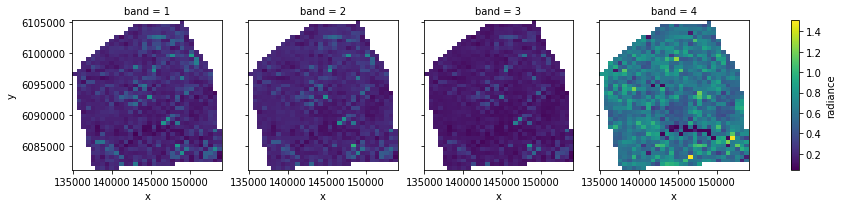

In [5]:
arr.radiance.isel(time=0).plot.imshow(col='band')

In [7]:
arr.load()

<xarray.Dataset>
Dimensions:   (band: 4, time: 8, x: 32, y: 40)
Coordinates:
  * band      (band) int32 1 2 3 4
  * y         (y) float64 6.105e+06 6.104e+06 6.104e+06 6.103e+06 6.103e+06 ...
  * x         (x) float64 1.352e+05 1.358e+05 1.364e+05 1.37e+05 1.376e+05 ...
  * time      (time) int64 1455060900000000000 1458949080000000000 ...
Data variables:
    radiance  (time, band, y, x) float64 nan nan nan nan nan nan nan nan nan ...
    sensor    (time) object 'SPOT7' 'SPOT7' 'SPOT7' 'SPOT7' 'SPOT6' 'SPOT7' ...

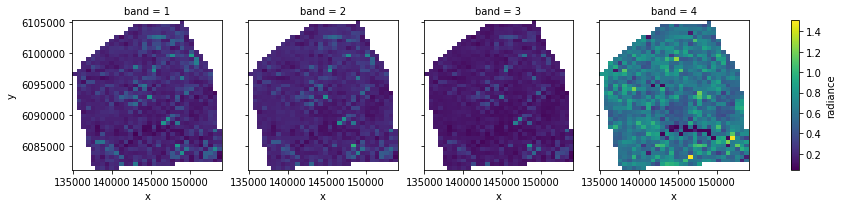

In [10]:
arr.radiance.isel(time=0).plot.imshow(col='band')